In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats



data = pd.read_csv('/content/drive/MyDrive/indian_liver_patient.csv')
data.head(30)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
data.shape

(583, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [ ]:
data.isnull().sum()


Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [ ]:
data['Albumin_and_Globulin_Ratio'].mode()

0    1.0
Name: Albumin_and_Globulin_Ratio, dtype: float64

In [ ]:
data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])

0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: Albumin_and_Globulin_Ratio, Length: 583, dtype: float64

In [ ]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [ ]:
data['Gender'] = data['Gender'].replace({'Male':0,'Female':1})
data.head(50)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [ ]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


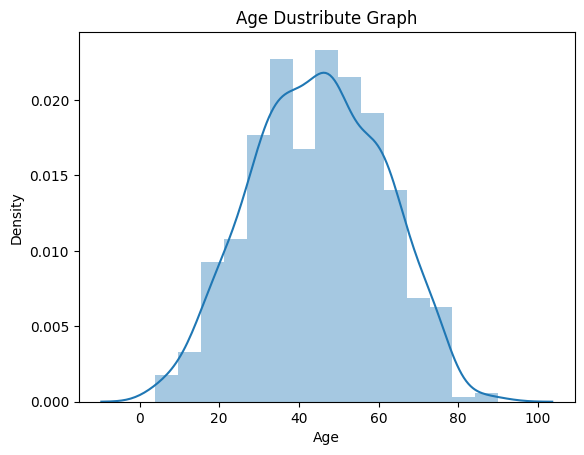

In [ ]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['Age'])
plt.title('Age Dustribute Graph')
plt.show()

<Axes: xlabel='Dataset', ylabel='count'>

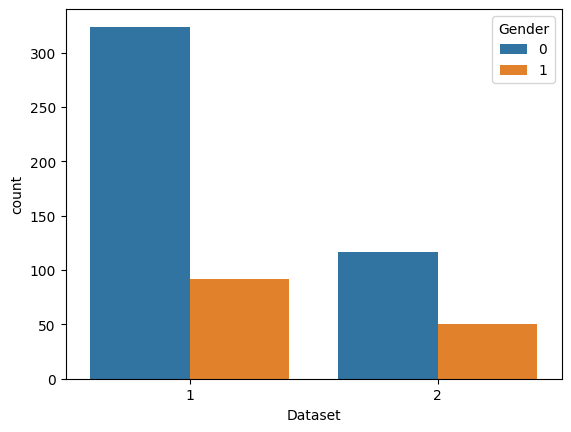

In [ ]:
sns.countplot(x=data['Dataset'],hue=data['Gender'],data=data)


<Axes: >

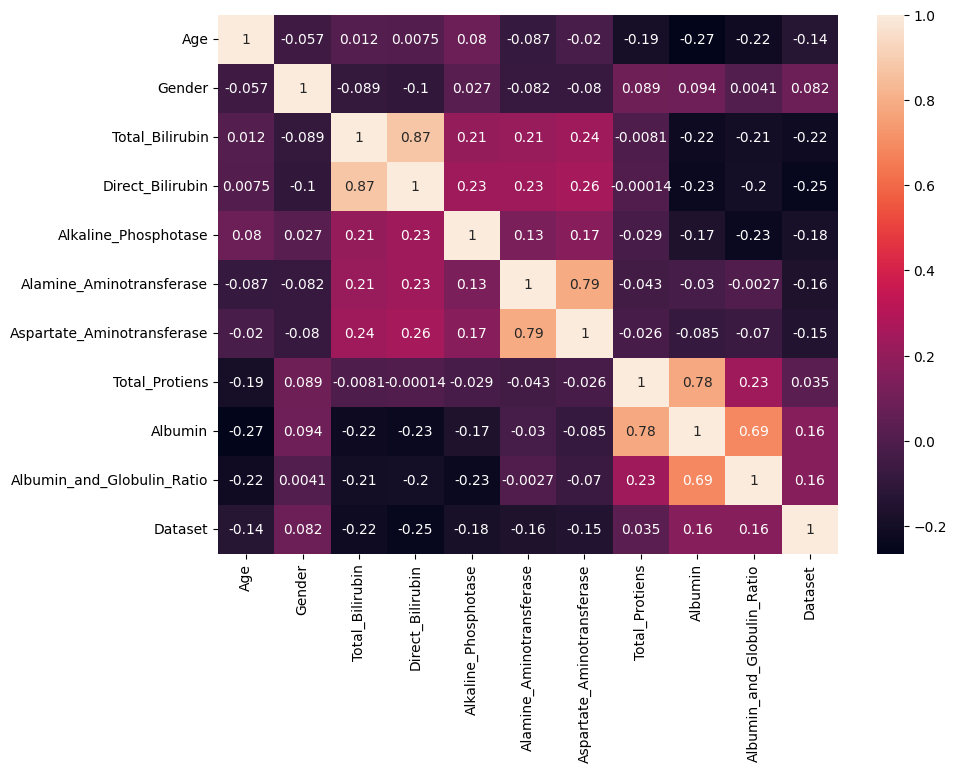

In [ ]:
plt.figure(figsize=(10,7))

sns.heatmap(data.corr(),annot=True)

In [ ]:
from sklearn.preprocessing import scale
X=data.drop(['Dataset'],axis=1)
Y=data['Dataset']
X_scaled=pd.DataFrame (scale(X),columns=X.columns)

In [ ]:
Y

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: Dataset, Length: 583, dtype: int64

In [ ]:
X_scaled.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.149025
1,1.066637,-0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651777
2,1.066637,-0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.180447
3,0.819356,-0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.165194
4,1.684839,-0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.720124


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.1,random_state=32)

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [ ]:
Y_train.value_counts()

1    367
2    157
Name: Dataset, dtype: int64

In [ ]:
X_train_smote,Y_train_smote=smote.fit_resample(X_train,Y_train)
Y_train_smote.value_counts()

1    367
2    367
Name: Dataset, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
model1.fit(X_train_smote,Y_train_smote)
Y_predict=model1.predict(X_test)

In [ ]:
confusion_matrix(Y_test,model1.predict(X_test))

array([[38, 11],
       [ 7,  3]])

In [ ]:
a = pd.DataFrame([np.array(Y_test),model1.predict(X_test)]).T
a.columns=['actual-value','predict-value']
print(a)
print(classification_report(Y_test,model1.predict(X_test)))


    actual-value  predict-value
0              1              1
1              1              1
2              1              1
3              1              1
4              1              1
5              1              1
6              1              1
7              1              1
8              2              1
9              1              2
10             1              2
11             2              1
12             1              1
13             1              1
14             1              1
15             1              1
16             1              1
17             1              1
18             2              1
19             1              1
20             1              1
21             1              1
22             1              2
23             1              1
24             2              2
25             2              2
26             1              1
27             2              1
28             2              2
29             1              2
30      

In [ ]:
import pickle

pickle.dump(model1,open('liver_pridict.pkl','wb'))

In [ ]:
pd.crosstab(Y_test,Y_predict)
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           1       0.84      0.78      0.81        49
           2       0.21      0.30      0.25        10

    accuracy                           0.69        59
   macro avg       0.53      0.54      0.53        59
weighted avg       0.74      0.69      0.71        59



In [ ]:
from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier()
model4.fit(X_train_smote,Y_train_smote)
Y_predict=model4.predict(X_test)
dtc1=accuracy_score(Y_test,Y_predict)
print(dtc1)
pd.crosstab(Y_test,Y_predict)
print(classification_report(Y_test,Y_predict))


0.6923076923076923
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        87
           2       0.40      0.40      0.40        30

    accuracy                           0.69       117
   macro avg       0.60      0.60      0.60       117
weighted avg       0.69      0.69      0.69       117



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train_smote,Y_train_smote)
Y_predict=model2.predict(X_test)
knn1=accuracy_score(Y_test,Y_predict)
print(knn1)
pd.crosstab(Y_test,Y_predict)
print(classification_report(Y_test,Y_predict))

0.5213675213675214
              precision    recall  f1-score   support

           1       0.79      0.48      0.60        87
           2       0.30      0.63      0.40        30

    accuracy                           0.52       117
   macro avg       0.54      0.56      0.50       117
weighted avg       0.67      0.52      0.55       117



In [ ]:
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(X_train_smote,Y_train_smote)
Y_predict=model5.predict(X_test)
logi1=accuracy_score(Y_test,Y_predict)
print(logi1)
pd.crosstab(Y_test,Y_predict)
print(classification_report(Y_test,Y_predict))

0.6239316239316239
              precision    recall  f1-score   support

           1       0.96      0.52      0.67        87
           2       0.40      0.93      0.56        30

    accuracy                           0.62       117
   macro avg       0.68      0.73      0.62       117
weighted avg       0.81      0.62      0.64       117



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
classifier=Sequential()

In [ ]:
classifier.add(Dense(10, activation='relu'))

In [ ]:
classifier.add(Dense(50, activation='relu'))

In [ ]:
classifier.add(Dense(2, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam',loss='binary_crrossentropy',metrics=['accuracy'])

In [ ]:
classifier.fit(print(X_train_smote,Y_train, batch_size=100,validation_split=0.2, epochs=100))

TypeError: ignored

In [ ]:
model4.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8,]])

array([1])

In [ ]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8,]])


array([1])

In [ ]:
classifier.save("liver.h5")

In [ ]:
Y_predict=classifier.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [ ]:
Y_predict=(Y_predict>0.5)
Y_predict

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [ ]:
def predict_exit(sample_data):
  sample_data=np.array(sample_data)
  sample_data=sample_data.reshape(1,-1)
  sample_data=scale(sample_data)
  return classifier.predict(sample_data)

In [ ]:
sample_data=[[35,0,1.8,0.6,275,48,178,6.5,3.2,0.90]]
if predict_exit(sample_data)>0.5:
  print('prediction:Liver Patient')
else:
  print('prediction:Helthy')

1/1 [==============================] - 0s 22ms/step
prediction:Liver Patient


In [ ]:
acc_smote=[['knn classifier',knn1],['randomforest modeel',rfc1],['dcisiontreeclassifier',dtc1],['logistricregression',logi1]]

In [ ]:
Liverpatient_predict=pd.DataFrame(acc_smote, columns=['classification models','accuracy_score'])
Liverpatient_predict

,classification models,accuracy_score
0,knn classifier,0.564103
1,randomforest modeel,0.692308
2,dcisiontreeclassifier,0.675214
3,logistricregression,0.641026


AttributeError: ignored

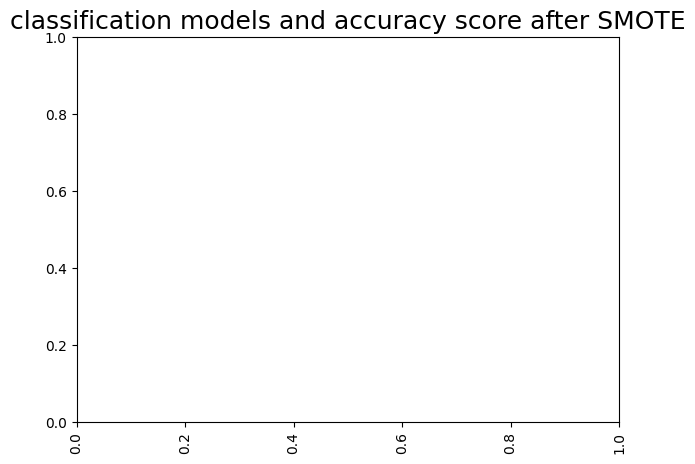

In [ ]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('classification models and accuracy score after SMOTE',fontsize=18)
sns.barplot(X="classification models",Y="accuray_score",data=Liverpatient_predict,palette="Set2")